In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


In [2]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')

In [3]:
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [7]:

columns_list = df.columns.tolist()
print(columns_list)

['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills']


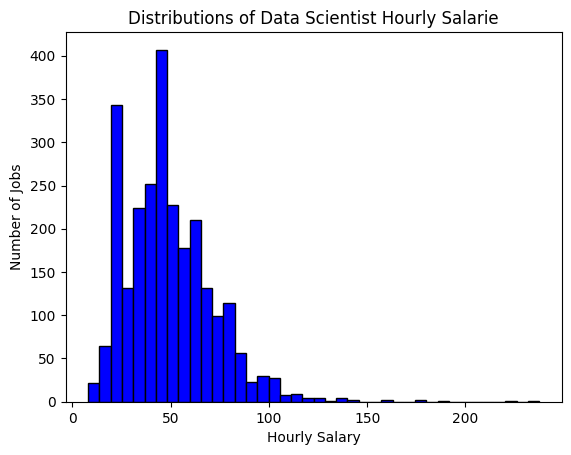

In [19]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])
df_DS['salary_hour_avg'].plot(kind='hist', bins = 40, color = 'blue', edgecolor = 'black' )

plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distributions of Data Scientist Hourly Salaries')
plt.show()


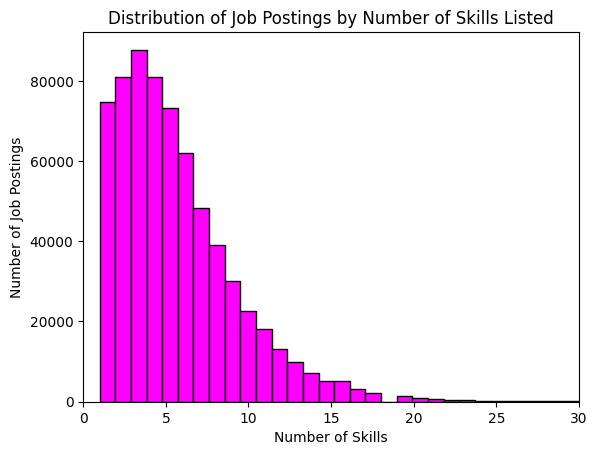

In [36]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
df_skills['num_skills'].plot(kind= 'hist', bins = 55, color = 'magenta', edgecolor = 'black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.xlim(0, 30)
plt.show()

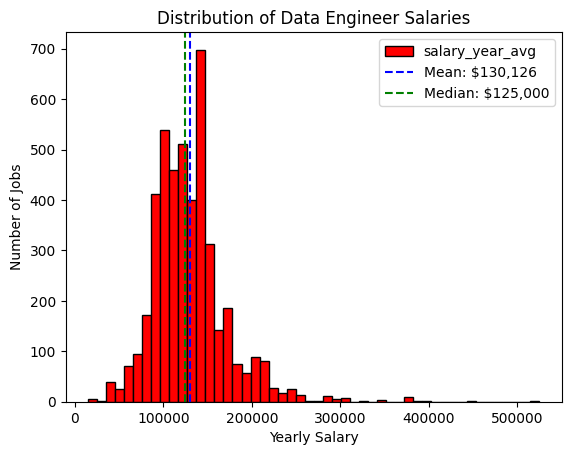

In [39]:
df_DE = df[df['job_title_short'] == 'Data Engineer']
df_DE['salary_year_avg'].plot(kind='hist', bins = 50, color = 'red', edgecolor = 'black')

mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')

plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.title('Distribution of Data Engineer Salaries')
plt.show()

AttributeError: 'builtin_function_or_method' object has no attribute 'df'